In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:20<00:00, 42.3MB/s]
100% 812M/812M [00:20<00:00, 41.5MB/s]


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [10]:
#printing names of images
file_names = os.listdir('/content/train/')
print(file_names)

['cat.10138.jpg', 'dog.9346.jpg', 'dog.151.jpg', 'cat.8802.jpg', 'cat.4225.jpg', 'dog.8884.jpg', 'dog.1561.jpg', 'dog.6497.jpg', 'cat.9513.jpg', 'cat.9964.jpg', 'dog.9539.jpg', 'dog.6027.jpg', 'cat.9239.jpg', 'dog.6861.jpg', 'cat.11050.jpg', 'dog.1593.jpg', 'cat.4761.jpg', 'dog.5101.jpg', 'dog.12120.jpg', 'cat.10064.jpg', 'cat.11785.jpg', 'dog.10058.jpg', 'dog.4749.jpg', 'dog.3190.jpg', 'dog.2867.jpg', 'cat.10691.jpg', 'cat.265.jpg', 'cat.6920.jpg', 'cat.12374.jpg', 'cat.4789.jpg', 'dog.9368.jpg', 'cat.3359.jpg', 'dog.11521.jpg', 'dog.11076.jpg', 'cat.2526.jpg', 'cat.10925.jpg', 'dog.9916.jpg', 'dog.10933.jpg', 'dog.9369.jpg', 'cat.11604.jpg', 'cat.2141.jpg', 'cat.3870.jpg', 'cat.10491.jpg', 'cat.2986.jpg', 'dog.1533.jpg', 'dog.8479.jpg', 'cat.10115.jpg', 'cat.10562.jpg', 'cat.10480.jpg', 'cat.10829.jpg', 'cat.1518.jpg', 'dog.789.jpg', 'dog.8394.jpg', 'dog.5687.jpg', 'cat.11330.jpg', 'cat.8604.jpg', 'cat.10243.jpg', 'cat.1747.jpg', 'cat.7223.jpg', 'cat.5340.jpg', 'cat.4607.jpg', 'cat.7

In [11]:
#import dependencies
import numpy as np
import matplotlib.image as npimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

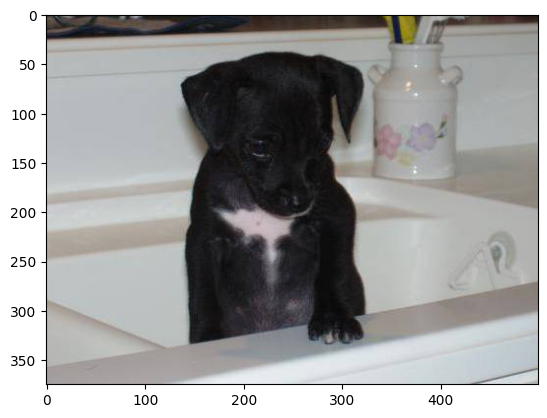

In [12]:
#display dog images
img=npimg.imread('/content/train/dog.8298.jpg')
plt.imshow(img)

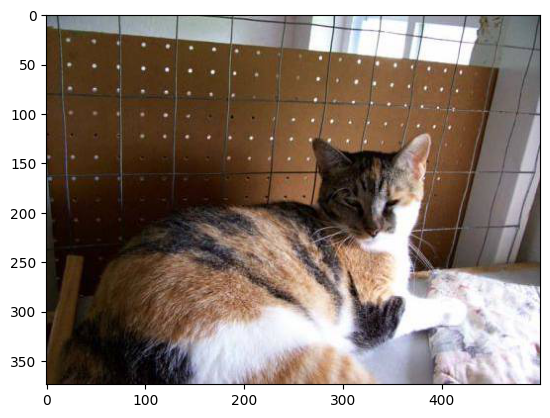

In [13]:
#display cat image
img=npimg.imread('/content/train/cat.8802.jpg')
plt.imshow(img)


In [14]:
#Image preprocessing-put dog and cat images in separate file, we don't use all dog and cat images, because of transfer learning, we use only as small amount
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])


cat
dog
dog
cat
cat


In [15]:
#display number of dog and cat images
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [16]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [18]:
from PIL import Image
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

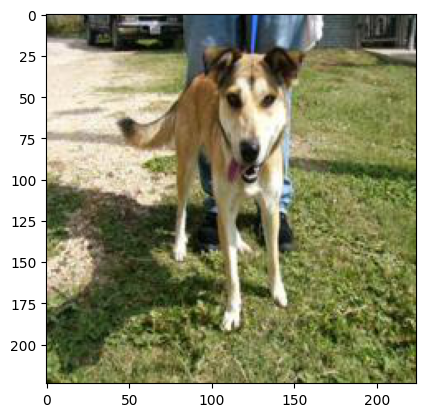

In [20]:
#resized dog
img=npimg.imread('/content/image resized/dog.151.jpg')
plt.imshow(img)

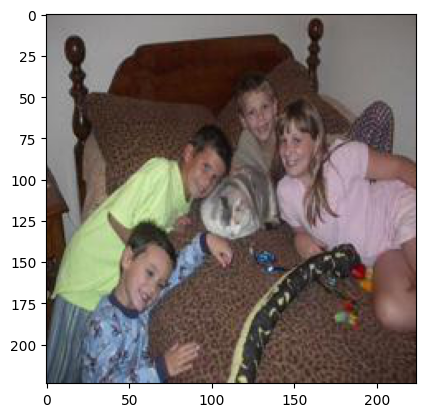

In [21]:
#resized cat
img=npimg.imread('/content/image resized/cat.9513.jpg')
plt.imshow(img)


In [22]:
#dog and cat picture is of same size

In [23]:
#Label cats to 1 and dogs to zero
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [24]:
#count number of cats and dogs out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 958 1042]


In [25]:
#read all images and convert to numpy arrays
import cv2
import glob

In [26]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [55]:
print(dog_cat_images)

[[[[ 10   7   3]
   [ 10   7   3]
   [ 10   7   3]
   ...
   [ 45  61  44]
   [ 45  60  46]
   [ 46  61  47]]

  [[ 10   7   3]
   [ 10   7   3]
   [ 10   7   3]
   ...
   [ 45  61  44]
   [ 45  60  46]
   [ 46  61  47]]

  [[  8   8   2]
   [  8   8   2]
   [  8   8   2]
   ...
   [ 45  61  44]
   [ 45  60  46]
   [ 46  61  47]]

  ...

  [[ 70  54   7]
   [ 75  58   9]
   [ 79  59  12]
   ...
   [172 117  36]
   [170 116  39]
   [169 117  41]]

  [[ 76  59  10]
   [ 78  61  10]
   [ 81  61  13]
   ...
   [166 113  33]
   [165 113  37]
   [167 116  43]]

  [[ 77  60   9]
   [ 78  61  10]
   [ 83  62  11]
   ...
   [164 110  33]
   [163 110  37]
   [166 114  43]]]


 [[[196 187 200]
   [208 199 212]
   [219 209 225]
   ...
   [ 71  79  96]
   [ 74  81  96]
   [ 77  84  99]]

  [[185 175 187]
   [189 181 192]
   [198 188 201]
   ...
   [ 59  68  82]
   [ 61  68  83]
   [ 62  70  83]]

  [[208 197 207]
   [201 192 202]
   [199 188 198]
   ...
   [ 49  58  71]
   [ 46  54  67]
   [ 41  50

In [56]:
print(dog_cat_images.shape)  #2000 images of 224,224 and RGB

(2000, 224, 224, 3)


In [57]:
x=dog_cat_images
y=np.asarray(labels)

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1600, 224, 224, 3) (1600,) (400, 224, 224, 3) (400,)


In [60]:
#1600 train images
#400 test images

In [61]:
x_train=x_train/255
x_test=x_test/255

In [62]:
#Build Neural Network
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [63]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

In [64]:
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [65]:
num_of_classes=2
model=keras.Sequential([pretrained_model,keras.layers.Dense(num_of_classes)])

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [67]:
model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

In [ ]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 67s 1s/step - loss: 0.2022 - acc: 0.9212
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: 0.0717 - acc: 0.9775
Epoch 3/5
50/50 [==============================] - 62s 1s/step - loss: 0.0519 - acc: 0.9856
Epoch 4/5
50/50 [==============================] - 60s 1s/step - loss: 0.0394 - acc: 0.9887
Epoch 5/5
15/50 [========>.....................] - ETA: 41s - loss: 0.0280 - acc: 0.9937

In [70]:
loss, acc = model.evaluate(x_test, y_test)
print('Test Loss =', loss)
print('Test Accuracy =', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.0643 - acc: 0.9800
Test Loss = 0.06428620964288712
Test Accuracy = 0.9800000190734863


In [72]:
input_image_path='/content/00-puppy.jpg'
image=cv2.imread(input_image_path)

In [73]:
input_image_resize=cv2.resize(image,(224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

In [74]:
input_prediction=model.predict(image_reshaped)

1/1 [==============================] - 1s 666ms/step


In [75]:
print(input_prediction)

[[-2.5008886  3.029737 ]]


In [77]:
input_prediction_label=np.argmax(input_prediction)
print(input_prediction_label)

1


In [78]:
if input_prediction_label==0:
  print('Image is a cat')
else:
  print('Image is a dog')

Image is a dog


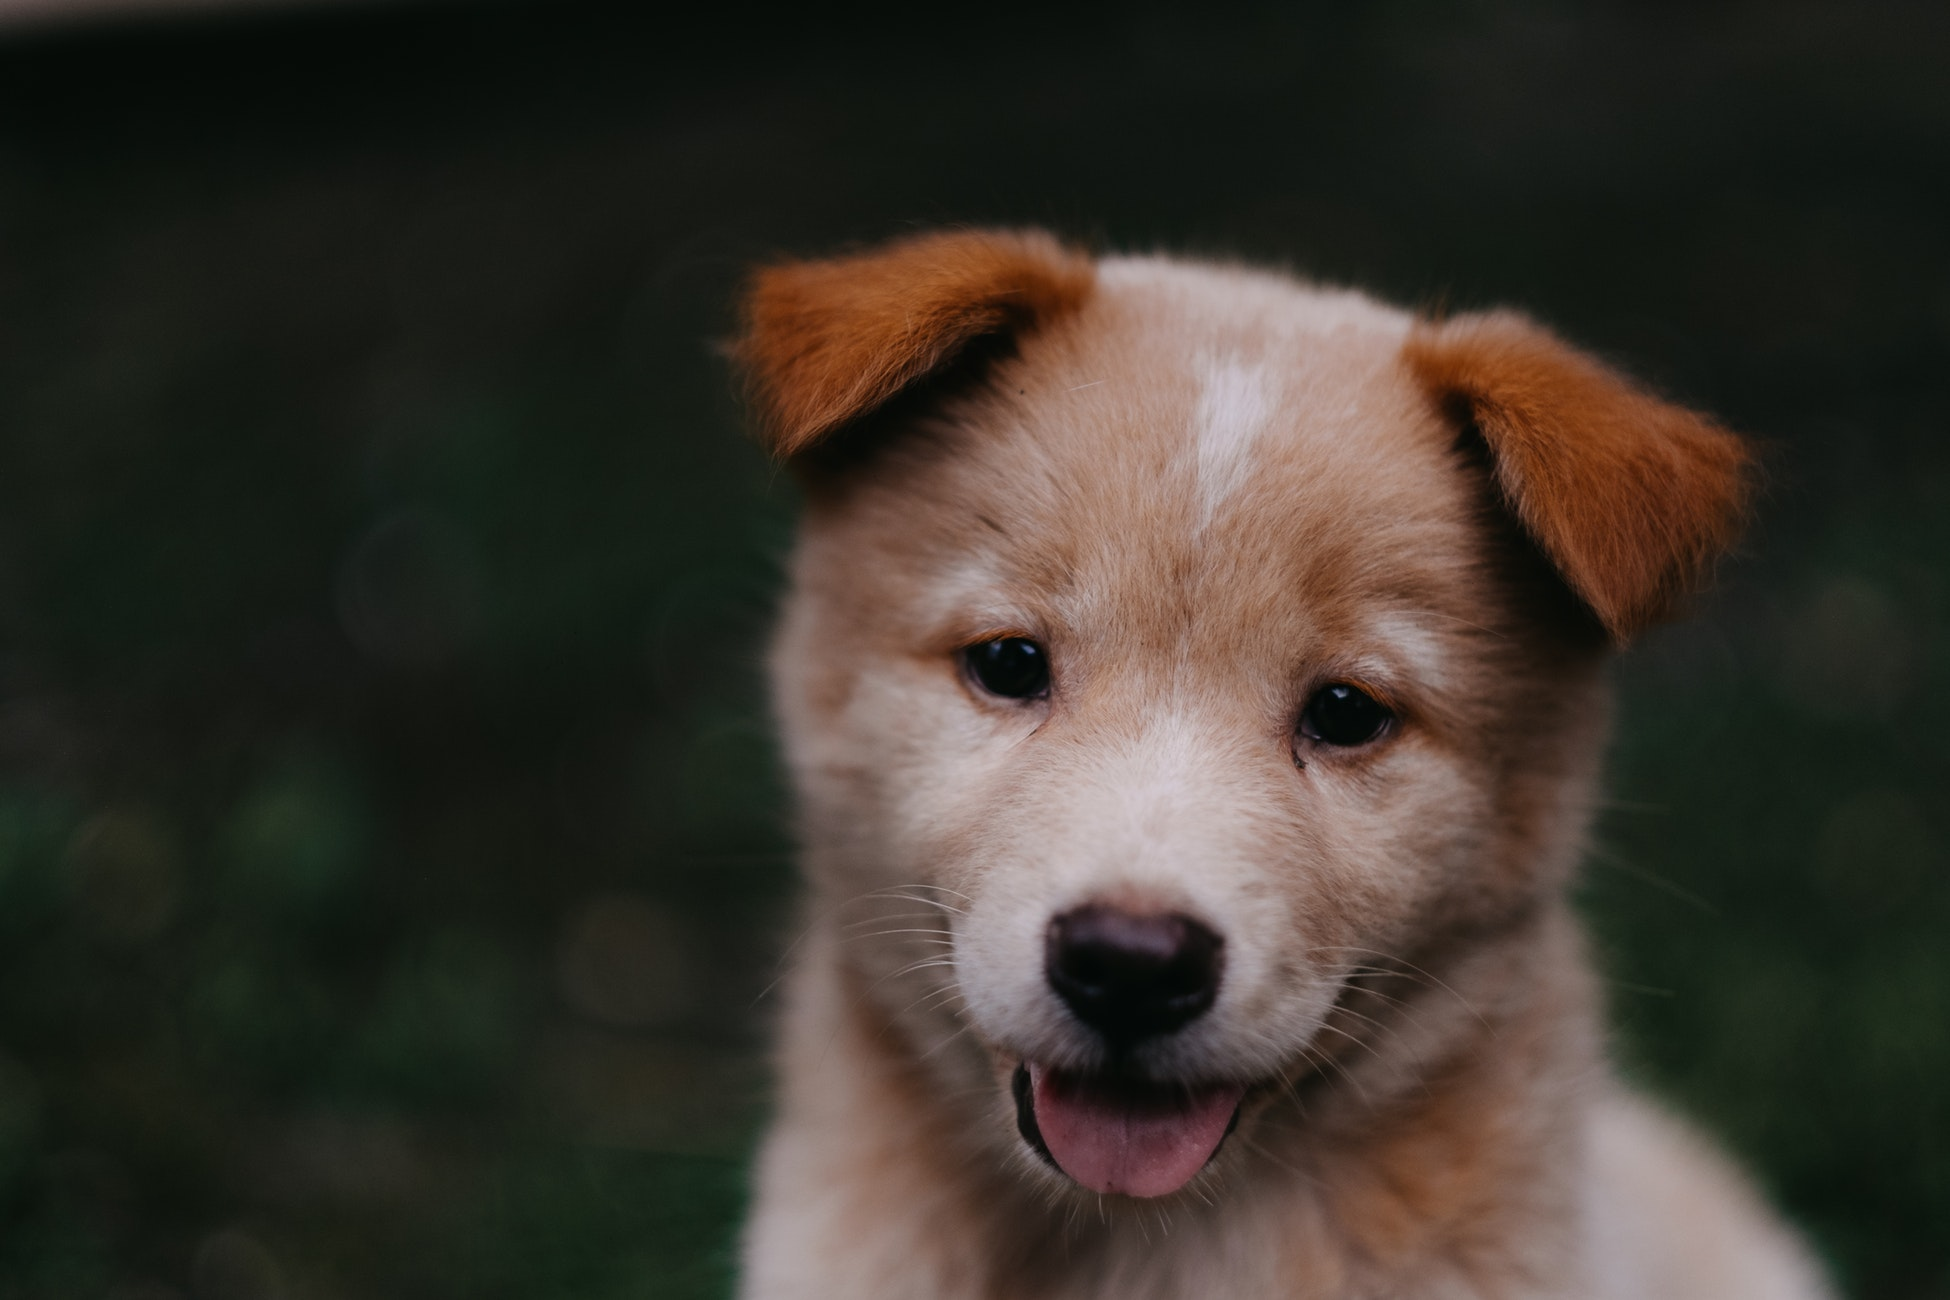

In [79]:
cv2_imshow(image)

In [80]:
input_image_path='/content/WhatsApp Image 2023-07-02 at 18.21.33.jpeg'
image=cv2.imread(input_image_path)
input_image_resize=cv2.resize(image,(224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction=model.predict(image_reshaped)
print(input_prediction)
input_prediction_label=np.argmax(input_prediction)
print(input_prediction_label)
if input_prediction_label==0:
  print('Image is a cat')
else:
  print('Image is a dog')


1/1 [==============================] - 0s 60ms/step
[[ 3.0247371 -3.8267274]]
0
Image is a cat


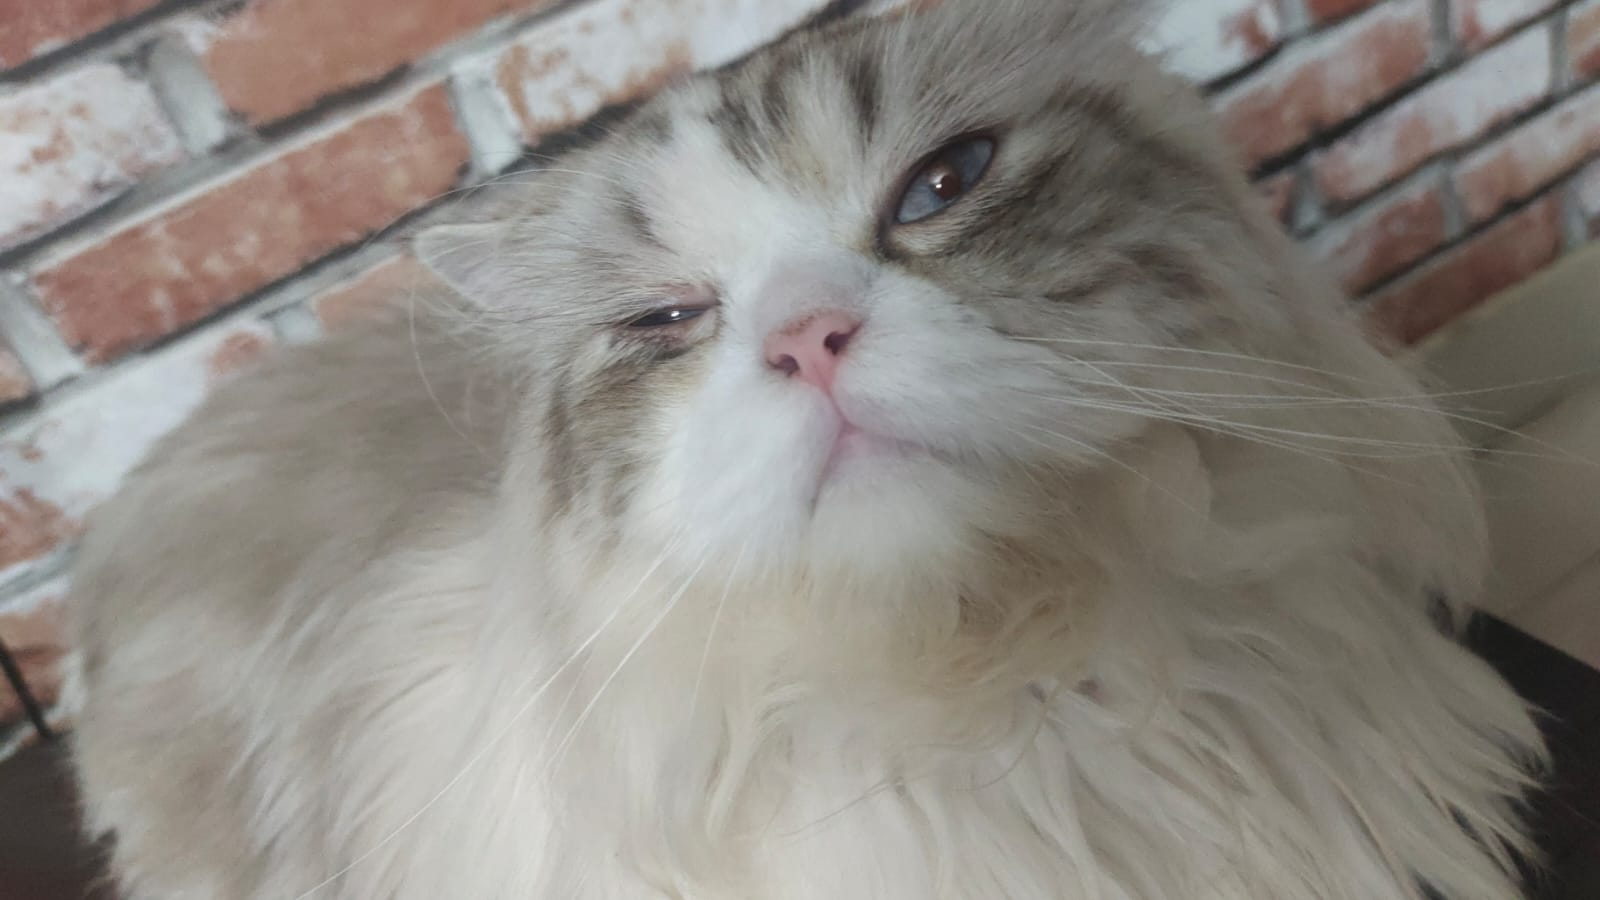

In [82]:
cv2_imshow(image)